# 第９週：ベイズ推定


## データにもとづく推論

第9週コンテンツ前半、「ベイズ統計」についての講義動画です（過去の講義の録画です）。 クラスを問わず Cアカウントでログインの上、視聴してください。

動画その１（約８分）
<iframe width="640" height="360" src="https://web.microsoftstream.com/embed/video/ec395d74-e497-45b9-a6d9-0285f5a75c73?autoplay=false&showinfo=true" allowfullscreen style="border:none;"></iframe>

動画その２（約４０分）
過去の講義の録画です

<iframe width="640" height="360" src="https://web.microsoftstream.com/embed/video/ebc32c19-04e7-475a-80ea-c2418f4191ef?autoplay=false&showinfo=true" allowfullscreen style="border:none;"></iframe>

ベイズ推定、あるいはベイズ統計学とは、データにもとづく推論にベイズの定理（ていり：theorem）を積極的に利用する方法論をいい、現在では、さまざまな分野で活用されている。

たとえば、厚生労働省では、生命表（せいめいひょう：life table）という調査を行っている。

[外部サイト：厚生労働省：生命表について](https://www.mhlw.go.jp/toukei/saikin/hw/seimei/list54-57-01.html)

この調査には、市町村別に死亡者数を調べる調査も含まれている。日本に在住する人の平均寿命は、こうした調査にもとづいて推測（すいそく）されている。この調査では、市町村ごとに死亡率を推定するが、町や村といったレベルで調査を行うと、調査の期間中、死亡者が0ということもある。すると、この町や村の死亡率は 0.0 ということになるが、それは正しい推定だろうか？

この調査の目的は、決められた年の調査結果をもとに、その町や村での死亡率の傾向を知ることが目的なので、たまたま死亡者数がゼロだったからといって、 死亡率を 0.0 と判断するわけには行かない。そのような推定を政府として発表すると、冗談のような話だが、「死ぬことのない町」というような宣伝をする業者なども現れるかもしれない。

このような場合、そもそも死亡率は0.0ではないという情報（後述するが、事前分布という）をもとに、その町ないし村の死亡率を推定することが行われている。

### 平均寿命について

ちなみに、平均寿命（へいきんじゅみょう：average life span）はかなり誤解されている。

たとえば、日本で明治（めいじ：Meiji, Japanese era）の頃の男性の平均寿命は 43 歳であるが、 平成の終わりには 80歳を超えるようになっている。このことから、「昔の人は40歳ぐらいで亡くなったのに、いまは、さらに40年も生活を続けなければならないのだから、新しいライフスタイルが必要だ」などという意見をいう人がいたりする。新しいライフスタイルが必要かどうかはともかく、この意見は誤解である。一般に平均寿命と言われている場合、正確には0歳時の平均余命（へいきんよめい：life expectancy）のことを指しているのがほとんどである。

たとえば、子供が4人生まれたとしよう、このうち2人は生まれてすぐに亡くなってしまったが、残った2人は80歳まで暮らした。この場合、平均余命は (80+80) / 4 で40歳ということになる。次に子供が4人生まれ、そのうち一人はすぐに亡くなってしまったが、残った3人は80歳まで生きた。すると、平均寿命は (80+80+80)/4 で 60 歳ということになる。平均寿命は 20 歳増加しているが、全員の寿命が延びているわけではない。

すなわち、平均寿命（0歳時の平均余命）では、新生児が生まれた年を生き延びることができるかどうかが問題になっているのである。だから、江戸（えど：Edo era）時代だろうが、明治時代だろうが、60歳、あるいは80歳まで暮らしている人は少なからずいたわけである。

## 原因の確率

データサイエンスの観点からは、ベイズの定理は原因の確率 (probability of cause) と言われることがある。それは、ある事象(event)が生じたという現象が観察されたとき、では、その原因はなにかを確率的に推測する方法として、ベイズの定理が用いられるからである。

さきほどの生命表の例にあてはめると、ある町の死亡者数が 0 という結果から、その町の死亡率（原因というには違和感があるかもしれないが）を求めることに相当する。

ここで、あるイベントを $E$ で表し、その原因を $A_i$ で表現すると、ベイズの定理は以下のように表される。

$$
P(A_i|E) =\frac{P(A_i) P(E|A_i)}{\sum_i^n{P(A_i)\, P(E|A_i)}}
$$

$E$ というイベントは $A_i$ 以外（たとえば $A_j$）が原因でも起こりうる。つまり、上の式の分母は、 $E$ の原因となるすべての原因 $A_1, A_2, \dots, A_n$ の確率を合計している。この値で分子、すなわち、ある $A_i$が原因である確率を割っていることになる（周辺化：しゅうへんか：marginarizationといい、単に $P(E)$ と表記することも多い）。

ベイズ統計と従来の統計の違いについては、さまざまな議論がなされている。 が、いわゆる「ベイズ統計」の核心になるのは**条件付き確率**（じょうけんつきかくりつ：conditional probability）である。ベイズの定理でいえば $P(A_i|E)$ が条件付き確率で（日本の高校では $P_E (A)$ と表記する）、「$E$が起こったときに$A_i$が起こる確率」を表す。

## 条件付き確率

条件付きの確率については、われわれの直感（ちょっかん：intuition）があまり、あてにならないことを示す例がある。

たとえば、ある感染症について、次のような情報があるとする。

この感染症には、全体（たとえば日本国内に住んでいる人）の0.01％がかかっている。この感染症には検査方法があり、実際に感染している人だと95％が陽性（ようせい：positive）と判定される。逆にいうと、感染しているにも関わらず間違って陰性（いんせい：negative）と判断される人が５％いる。一方、感染していない人がこの検査を受けると90％が陰性と判断されるが、10％の確率で誤って陽性だと判断されてしまう。

さて、ある人がこの検査を受けたところ、陽性だと判定された。このとき、この人が実際に感染している（陽性である）確率はどれくらいだろうか？

まず、確率を整理していこう。

1. 感染症にかかっている $E_1$ 確率を $P(E_1)=0.0001$ 
2. 感染症にかかっていない $E_2$ 確率を  $P(E_2)=0.9999$ 

感染症にかかっている人が検査で陽性と判定される確率であるが、これは条件付き確率である。
いま陽性を判定されることを $A_1$ とする。陰性と判定されることは $A_2$ とする。

1. 感染している($E_1)$ 人が陽性と判断される($A_1$)条件付き確率 $P(A_1|E_1) = 0.95$（日本の高校では $P_{E_1}(A_1)$ と表記）
2. 感染している人が陰性と判断される条件付き確率 $P(A_2|E_1) = 0.05$
3. 感染していない人が陽性と判断される条件付き確率 $P(A_1|E_2) = 0.10$
4. 感染していない人が陰性と判断される条件付き確率 $P(A_2|E_2) = 0.90$

さて、この情報にベイズの定理(Bayes theorem)を適用しよう。


\begin{aligned} P(E_1|A_1) &= \frac{ P(E_1) \, P(A_1|E_1)} {P(E_1) \, P(A_1|E_1) + P(E_2) \, P(A_1|E_2)  } \ &= \frac{0.0001 \times 0.95 } { 0.0001 \times 0.95 +  0.9999 \times 0.10}  \ &= 0.0009491932 \end{aligned}





$$
P(E_1|A_1) = \frac{ P(E_1) \, P(A_1|E_1)} {P(E_1) \, P(A_1|E_1) + P(E_2) \, P(A_1|E_2)  } \ = \frac{0.0001 \times 0.95 } { 0.0001 \times 0.95 +  0.9999 \times 0.10}  \ = 0.0009491932 
$$ 






計算すると約0.09％である。これは、「陽性と判定されたときに、本当にその感染症にかかっている確率」である。つまり、確率的にいうと、陽性と判定されても、その感染症に罹っている可能性は非常に小さい。もちろん、だからといって、検査を受けないでも構わないということにはならないが、要するに、そもそも感染症にかかっている確率が 0.01％ と低いのだから、検査を受ける人の 多くは陰性である確率が高いのであり、そのことを反映した結果である。ただし、検査で陽性が出たという結果を受けて、その人が陽性である確率 0.09％ が、一般に陽性である確率 0.01％ よりも高くなったことにも注意しよう。

## 事前分布と事後分布

ベイズ推定の特徴は、事前に想定されている確率が、データによってアップデートされ、確率が変わることである。前の節の例では、ある人が感染症に罹っている確率は0.01％ であったが、検査で陽性という結果が出たこと（というデータ）をうけて、その人が感染症に罹っている確率は 0.09％ にアップデートされた。 これを**ベイズ更新**（こうしん：update）という。また、最初に想定されていた確率を**事前確率**（じぜんかくりつ：prior probability）、ベイズ更新によって得られた確率を**事後確率**（じごかくりつ：posterior probability）という。

感染症の例では、一般に感染症にかかっている確率は0.01％であると想定した。一方で、その確率が正確には分からず、0.01% を中心に 0.005％から0.015％の間にあると想定される場合もあるだろう。この場合、事前の確率は 0.005％から0.015％の範囲のいかなる数値でもありうる。ただし、事前の確率は0.01%にきわめて近い数字で0.005％とか0.015％という両端に近い可能性は無いだろうという予想されたり、逆にまったく予想がつかず0.005％から0.015％の範囲であれば、どんな数値であってもおかしくないとか、いろいろな考え方ができるだろう。

そこで、事前の確率は、ある確率**分布**にしたがう数値だと考えることができる。正確な値はわからないが、ある範囲内におさまることは確実だと考えるのである。正規分布でたとえると、本当の確率は95％の確率で 0.005％から0.015％の範囲にあり、この範囲より小さいか大きいこともあり得るが、それらの確率は合計しても5％程度でしかない、というふうに仮定を立てることができる（想定なので、実際にそうであるかどうかは問わない）。

あるいは 0.005％から0.015％の範囲のいかなる数値でもありえ（ただし、この範囲をはずれることはない）、かつ、いずれかの数値である確率はまったく等しいと考えることもできる。これは、**事前分布**(prior distribution) として**一様分布**（いちようぶんぷ：uniform distribution）を想定する立場である。

たとえば、0から1.0の範囲であれば、いかなる数値でも同じ確率で出現することをシミュレーションしてみよう。以下は、一様分布にしたがう乱数を10万個生成し、それぞれの値を横軸に、その値の密度（全体に占める割合に近い数値）を縦軸にとったグラフである。

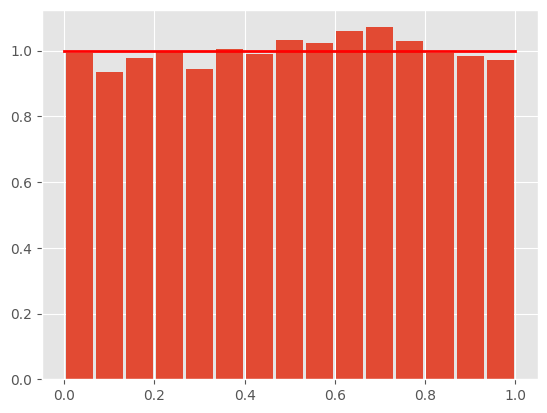

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
s = np.random.uniform(0,1,10000)
count, bins, _ = plt.hist(s, 15, density=True,rwidth=0.9)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')

この図の縦軸は確率ではありません。一様分布は、連続量の分布であるので、確率は範囲（積分）で求められます。縦軸は確率密度を表します。

乱数のシミュレーションなので、赤いバーは多少でこぼこしているが、究極的にはバーの天井は、赤く引かれた横線と一致することになる。この意味は、たとえば0から0.1の間の数値が選ばれる確率（範囲を積分した値）と、0.4から0.5の間の数値が選ばれる確率（範囲を積分した値、0.8から0.9の間の数値が選ばれる確率（範囲を積分した値などなど、横軸の区間（間隔）が同じであれば、それらの範囲からある特定の数値が選ばれる確率は、まったく同じであることを意味している。

一様分布は、（ある範囲内という条件はあるものの）、どのような値も同じ確率でありうるという仮定を確率分布で表しているといえる。これは、どのような値が出るか、前もって情報はないことに近い（くどいが、厳密には、ある特定の範囲であるという情報はあるのだが）。そこで、**無情報事前分布**（むじょうほうじぜんぶんぷ：non-informative prior distribution）という。

## 事前分布からの推論

事前分布を考えることにどのような意味があるだろうか？ たとえば、コインを5回投げたら、5回とも裏が出たとしよう。すると、表が出る確率が実は 0.5 ではなさそうな気もする（ちなみに、裏が連続して5回出現する確率は求められるだろうか？）。 表が出る確率は 0.5 ではなさそうだが、かといって、コインを観察してもよくわからない。ただ表が出る確率が1.0ではないことは、いま、コインを振った結果から明らかである。 では、どうするかというと、このコインで表が出る確率は、0.5よりも小さい値を中心に、その左右に広がっているが、少なくとも1.0では無いだろうという分布を考えるのである。 たとえば以下がその候補と考えられるだろう。

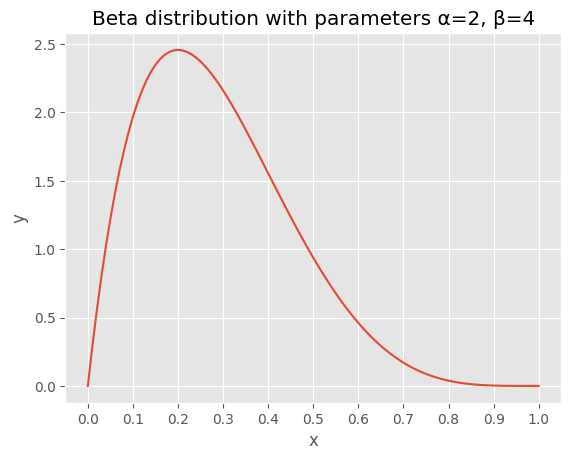

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta

x = np.linspace(0, 1, 101)
y = beta.pdf(x, 2, 5)
df = pd.DataFrame({'x': x, 'y': y})

fig, ax = plt.subplots()
ax.plot(df['x'], df['y'])
ax.set_title("Beta distribution with parameters α=2, β=4")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()


この曲線の山の頂点は X 軸でいうと、0.2 あたりにある（ちなみにY軸は確率密度である）。表が出る確率（正確には）がかなり小さくて、少なくとも0.5を超えている可能性は低そうだという想定を、確率分布で表現している。 ちなみに、この分布は**ベータ分布**という。ベータ分布の形は2つのパラメータ $\alpha, \beta$ で決まる。このグラフでは $\alpha = 2, \beta = 4$ を設定している。ちなみに、ベータ分布はパラメータを変えると、グラフの曲線もかなり変わってくる。

[外部サイト：ウィキペディア：ベータ分布](https://ja.wikipedia.org/wiki/%E3%83%99%E3%83%BC%E3%82%BF%E5%88%86%E5%B8%83)

$$
f(x|\alpha, \beta) = \frac{x^{\alpha-1} \, (1-x)^{\beta-1} }{\beta(\alpha, \beta)}
$$

$\theta$ は成功する確率（たとえば表が出る確率）である。
分母の $Beta$ はベータ関数を表す。

[外部サイト：ウィキペディア：ベータ関数](https://ja.wikipedia.org/wiki/%E3%83%99%E3%83%BC%E3%82%BF%E9%96%A2%E6%95%B0)

一方、コインで裏が5回でた。コイン投げのように表か裏が出る繰り返した結果は、**二項分布**（にこうぶんぷ：binomial distribution）で表現される。
ある確率 $\mu$ を想定したとき、コインを $N$ 回投げて表が $x$ 回出る確率を次のように表現する。

$$
p(x | \mu) = \binom{N}{x} \, \mu^x \, (1 -\mu)^{N - x}
$$



さて、コイン投げで表が0回でという結果を受けて、コインで表が出る確率 $p(\mu|x)$ を推定するにはベイズの定理を適用する。

$$
p(\mu | x) = \frac{p(\mu)\, p(x|\mu)} { \int p(\mu) \, p(x|\mu) \, d \mu} 
$$

$p(\mu)$ はある $\mu$ の値が、想定される分布から得られる確率密度を表している。
連続量の分布の場合、ポアソン分布のような離散分布とは異なり、確率関数の値は確率そのものではなく、密度（みつど：density）である（全体に占める割合を表していることに近い）値である。また、$p(x|\mu)$ は、確率$\mu$で得られたるデータの分布を表しているが、これを**尤度**（ゆうど：likelihood）という。

尤度を考えるという意味は、たとえば身長は正規分布を当てはめることができるだろうが、実際に身長のサンプル（データ）を集めたとき、このデータの背後にある正規分布のパラメータ（平均値と標準偏差）として、もっともありそうな値を推定することである。

[外部サイト：ウィキペディア：尤度関数](https://ja.wikipedia.org/wiki/%E3%83%99%E3%83%BC%E3%82%BF%E5%88%86%E5%B8%83)


この分母は、分子の式の積分（せきぶん：integrate）になっている。コインの表が出る確率 ($\mu$) はわからないのだが、裏が0回出たという結果を受け、表が出るあらゆる確率 $P$（0.2かもしれないし、0.33かもしれないし・・・など）を検討しているのである。

直感的にいうと（かんたんにいうと）、上の式は、分子が全体に占める割合を計算しているのだと思えば良い。

計算は大変そうだが、この場合に関していうと、ショートカットがある。事前分布と想定したベータ分布のパラメータ $\alpha$ に表が出た回数を、またパラメータ $\beta$ に裏が出た回数を足すと別のベータ分布になるが、これが**事後分布**(posterior distribution)になるのである。つまり $\alpha = 2+0, \beta = 4+5$ のベータ分布となる。

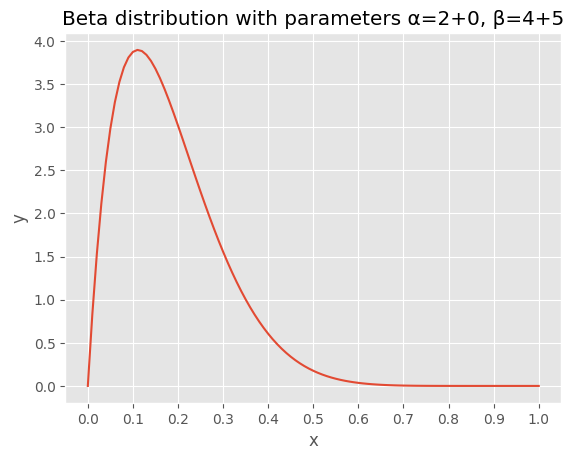

In [8]:
x = np.linspace(0, 1, 101)
y = beta.pdf(x, 2 + 0, 4 + 5)
df = pd.DataFrame({'x': x, 'y': y})

fig, ax = plt.subplots()
ax.plot(df['x'], df['y'])
ax.set_title("Beta distribution with parameters α=2+0, β=4+5")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

表が出る確率が、最初に考えた 0.5 よりも、また事前分布と想定したベータ分布の曲線の頂点の値よりも、さらに左に移動し、0.1に近くなっているのが確認できるだろうか？


ベータ分布には平均値を求める公式がある。$\frac{\alpha + x}{\alpha + \beta+ N}$ であるから、事後分布のパラメータを代入すると、$\frac{2 + 0}{4 + 5} = 0.222$ となる。5回連続で裏が出たことにより、表が出る確率は 0.222 と小さくなったが（ちなみに、上のグラフは左右対称ではないので、曲線のピークと平均値は一致していない）、0/5=0 のように0にはならないことに注目されたい。

この計算方法は、最初に紹介した市町村別に死亡率（しぼうりつ：mortality rate）を推定することにも使われている。小さな村では、その年に死亡した村人が0人となることもあるだろう。が、このことから、その村の死亡率は0であるなどと推定するわけにはいかない。そこで、全国平均を事前分布として、その村の死亡率の計算が行われる。

[外部サイト：厚生労働省：ベイズ推定とは](https://www.mhlw.go.jp/toukei/saikin/hw/life/ckts05/sanko02.html)

### ベータ分布の応用

もう少し、応用を考えてみよう。

> あるブラック企業では毎年新規採用者の四割がやめるという状況であった。ところが、今年度採用された 5 人は、まだ 1 人も退職していない。すなわち離職率は0.0ということになったことから、この会社がホワイト企業になったと考えてもよいか。

離職率が0.0だからといって、ホワイト企業だとはいえないだろうが、ベイズの方法を試す簡単な事例として考えてみよう。

まず、今年度の離職率が0.0だからといって、この会社の離職率は0.0、すなわちホワイト企業と判断するわけにはいかないだろう。過去の離職率が 0.4 だというのが、事前の情報となる。ただし、毎年、必ず 0.4 だったかどうかは分からないので、 0.4か、それよりも小さな値が曲線のピークとなるベータ分布を想定してみよう。

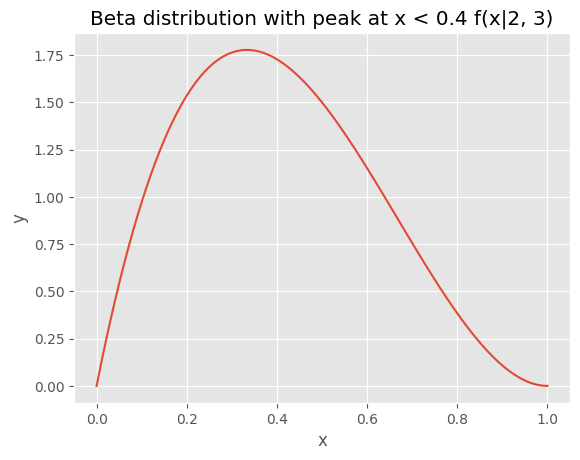

In [12]:
x = np.linspace(0, 1, 101)
y = beta.pdf(x, 2, 3)
df = pd.DataFrame({'x': x, 'y': y})

fig, ax = plt.subplots()
ax.plot(df['x'], df['y'])
ax.set_title("Beta distribution with peak at x < 0.4 f(x|2, 3)")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()

これを、このブラック企業の過去の離職率を表す事前の情報（事前分布）と考えよう。
このベータ分布のパラメータは $\alpha =2, \beta=3$ である。

次に、新しく得られたデータが 5人中0人辞めたということである。5つのうち陽性（この場合は辞めた事例）が0というのは、これまでこの授業で扱ってきた二項分布で表現されだろう。事前分布がベータ分布で、データが二項分布にしたがう場合、ベイズの方法で事後分布を求めると、その事後分布はベータ分布になることが知られている。事前分布ベータは、二項分布の共役事前分布（きょうやくじぜんぶんぷ：conjugate prior）であるという。

ベイズの方法で推論を行う場合、共役事前分布を想定すると、積分などを計算せずとも、簡単に事後分布を求めるショートカットがある。事前分布であるベータ分布のパラメータが $\alpha = 2, \beta = 3$ で、データが $y = 0, n - y  = 5$ だから、事後分布であるベータ分布のパラメータは $\alpha = 2, \beta = 8$ ということになる。

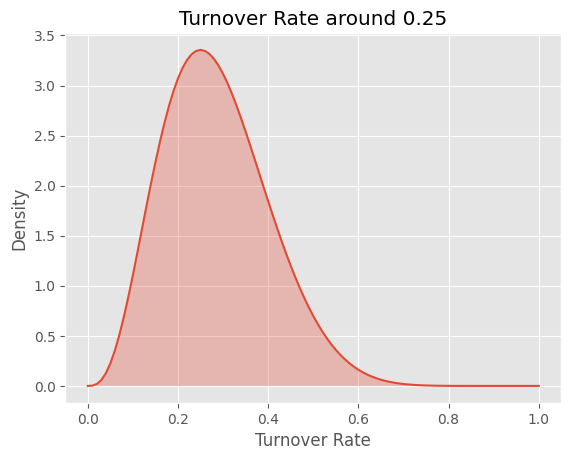

In [14]:
x = np.linspace(0, 1, 101)
y = beta.pdf(x, 4, 10)
df = pd.DataFrame({'x': x, 'y': y})

fig, ax = plt.subplots()
ax.plot(df['x'], df['y'])
ax.fill_between(df['x'], 0, df['y'], alpha=0.3)
ax.set_xlabel("Turnover Rate")
ax.set_ylabel("Density")
ax.set_title("Turnover Rate around 0.25")

plt.show()

山のピークは 0.25 のあたりである。つまり、今年度、誰も辞めていなくとも、もともと4割が辞めてしまうこの会社の離職率は、改善されたとしても、まだ 0.25 あたりだと推定できる（ただし、データが少なすぎるが）。

## 伝統的統計学とベイズ推定

最近、医学や心理学といった分野では、伝統的な統計的手法である検定に対して、警告がなされている。 たとえば、伝統的な統計分析で平均値の差を検定する場合、「母集団の平均値は $z$ である」を帰無仮説とし、「母集団の平均値は $z$ ではない」を対立仮説とする。その上でデータの分布からp値を求め、これが0.05（あるいは0.01)未満であれば、帰無仮説を棄却（ききゃく）し、対立仮説を採択（さいたく）する。

ただし、よく誤解されていることだが、p値は帰無仮説が正しい確率を表しているのではないことである。 そもそも、伝統的な仮説検定では「帰無仮説が正しい」ことが前提なのである。さらに、一般にデータの標本平均値と母集団の平均値が一致することはないだろう。p値は、帰無仮説が正しい場合に、いま目の前にあるデータ（から求めた標本平均値）および、これよりも極端なデータが得られる確率を表しているのである。これを誤解している研究論文が、実は世界中にあふれているのである。

とはいえ、実際のところ、統計的仮説検定は、そのロジックが遠回りすぎて、わかりにくいのも事実である。かつ、p値が 0.05 未満であれば「有意」だが、0.05ちょうどだったら、「有意ではない」と判断されるので、わずかなp値の差で結論（差がある、差がない）がまったく変わってしまうのも、納得しづらいだろう。

一方、ベイズ推定では帰無仮説が正しい確率を求めることができる。以下のようにベイズの定理を使うのである。

$$
p(H_0|D) = \frac{p(D|H_0) \, p(H_0)} { p(D) }
$$

言葉で表現すると、帰無仮説 $H_0$ が正しい確率を設定し（伝統的な仮説検定では、これは1である）、この仮定のもとでデータ $D$ が得られる確率（条件付き確率）を使うと、事後確率として、データ（$D$)が得られた場合に帰無仮説 $H_0$ が正しい確率を求められるのである。対立仮説を立てたければ、同様にして、対立仮説が正しい確率を求めることができる。

ここでも問題になるのは帰無仮説が正しい確率 $H_0$ をどのように設定するかであり、また、
この点で、ベイズ推論は、過去の伝統的な統計学から批判されてきた。

これについては、帰無仮説が正しい確率については情報がない（無情報事前分布）を想定するのが1つの方法と考えられ、現在、応用がさかんに行われている。


## MCMC

ベイズの定理を、複雑な確率分布に適用しようとすると、分母の積分も複雑になり、その解が現実的に求められないことがある（というより、現在のデータサイエンスの応用では求められないことがほとんどである）。

事後分布は、分母の積分を解かなければ計算できないので、このままでは事後分布（の平均値など）が分からない。そのため、過去においては、現実的なデータ分析で、ベイズ推定によって事後分布を求めることが実質的に不可能な場合が多かった。

しかし、現在では、積分そのものは解かずに事後分布を求める方法がいくつか開発されている。それはシミュレーションによる方法である。ごく簡単にいうと、事後分布から実際に乱数を生成してしまうのである。この代表的な方法がモンテカルロ法である。

<iframe width="560" height="315" src="https://www.youtube.com/embed/ELetCV_wX_c" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

動画では、正方形の真上から砂（点）をまんべんなく（砂と砂がかさなることがないように）落としていると考えると良い。この正方形が、まいた砂で隙間なく（かつ重なること無く）覆われたとしよう。このとき、円の中にある砂の数を、落とした砂の総数で割った数値をもとに、 円周率が推測できる。

事後分布も同じで、事後分布の積分が難しくとも、事後分布からランダムに値を取り出すことができるのであれば、たとえば100万回それを繰り返す。すると事後分布から100万個の値が取り出されるので、その値を合計して100万で割れば標本平均値を求めることができる。この標本平均値を、 事後分布の平均値の推定値として使うのである。

もちろん、このような作業はコンピュータで実行することになるが、事後分布からランダムに値を100万回取り出すことは、コンピュータにとって、簡単ではあっても重い処理である。また、砂を上から落とすと、当然、重なってしまう部分も出てくるだろう。重なりが増えてしまうと、割合の計算に影響もでる。

そのため、より効率的（砂が重ならないようにまんべんなく）に変数を取り出す方法が開発されている。その1つが、**マルコフ連鎖モンテカルロ法**（まるこふれんさもんてかるろほう：Markov chain Monte Carlo method）である。

<iframe width="560" height="315" src="https://www.youtube.com/embed/3mPxMlSiRvk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Pythonでマルコフ連鎖モンテカルロ法(MCMC)を使って、ベイズ推定を行うライブラリとしては PyStan がある。

[外部サイト：PyStan](https://pystan.readthedocs.io/en/latest/index.html)

## ベイズの応用

ベイズ推定が広く行われるようになったのは、ここ数年のことだが、実は応用は以前から積極的に行われてきた。たとえば、第二次世界大戦中、イギリス政府でドイツ軍の暗号（エニグマ）を解読するプロジェクトで、大きな成果をあげている。暗号が解読されたことにより、ドイツ軍の潜水艦の作戦がわかるになり、イギリスに物資を運ぶ貨物船などが攻撃されるのを防ぐことができたのである。しかし、イギリス政府は、このことを機密として長く公表していなかった。また暗号解読において重要な役割を果たした数学者アラン・チューリングも、 この功績を知られることがなく、政府から表彰されることもなかった。そのため、ベイズ推定の威力も長く知られることがなかったといえるだろう。

<iframe width="560" height="315" src="https://www.youtube.com/embed/QIrC-8T_hqk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

[外部サイト：ウィキペディア：アラン・チューリング](https://ja.wikipedia.org/wiki/%E3%82%A2%E3%83%A9%E3%83%B3%E3%83%BB%E3%83%81%E3%83%A5%E3%83%BC%E3%83%AA%E3%83%B3%E3%82%B0)

また、潜水艦（せんすいかん：submarine）が沈没（ちんぼつ：sink）した際、その海域（かいいき：sea area）を特定するのに使われていることでも知られている。 具体的には、海図（海のマップ）をいくつかの区画（grid)にわけ、それぞれに潜水艦が沈んでいる確率を割り振るのである（これが事前確率である）。 そして、事前確率の高い海域を捜索（そうさく）し、発見できなければ、事前確率をアップデートして、事後確率を求め、さらに海域を絞り込んでいくのである。

[外部サイト：ウィキペディア：潜水艦スコーピオン号](https://ja.wikipedia.org/wiki/%E3%82%B9%E3%82%B3%E3%83%BC%E3%83%94%E3%82%AA%E3%83%B3_(%E5%8E%9F%E5%AD%90%E5%8A%9B%E6%BD%9C%E6%B0%B4%E8%89%A6))

## Kaggle

Kaggle は、データサイエンス分野でデータサイエンティスト・エンジニアと、企業や自治体とをつなげる世界最大のプラットフォームです。Kaggleの目玉はCompetetion（コンペ）で、企業や自治体がデータ分析の課題を提示し、もっとも精度の高い分析結果に対しては賞金を出しています。また、有能なデータサイエンティストに対しては採用をオファーしてもいます。

この講義では締めくくりとして、受講生を７名程度の班にわけ、それぞれの班のメンバー全員がKaggleに登録し、班のメンバで相談の上、Kaggleで提示されているデータの分析、あるいはコンペに挑戦してもらいます。

### Kaggleへの登録

ここからの説明は以下の動画で確認できます。ただし過去の講義の録画なので、今年度の情報・指示とは合致しない点があることに注意してください。

<iframe width="640" height="360" src="https://web.microsoftstream.com/embed/video/837538c7-c74f-43fa-b039-eac6e66f131b?autoplay=false&showinfo=true" allowfullscreen style="border:none;"></iframe>

まず、受講生はKaggleに登録、つまりKaggleでアカウントを作成してください。来週までに必ず作業を終えておいてください。

https://www.kaggle.com/

登録にはメールアドレスが必要です。大学アドレスでもGoogleアカウントなどでも構いませんが、登録の際、設定するUsernameは、あとで申告してもらいます （実際には、アカウントを作成することで、ユーザーごとに作成されるホームURLを申告してもらいます）。なお、Usernameとして、学生番号やCアカウントを指定するのは避けてください。Usernameは世界中に公開されることになりますので、個人情報につながる情報を使うべきではありません。

アカウントを作成したら、以下の外部サイトで、Kaggleの様子などを知っておくと良いかもしれません。

[外部サイト：Qiita：Kaggleに登録したら次にやること](https://qiita.com/upura/items/3c10ff6fed4e7c3d70f0)

<iframe width="560" height="315" src="https://www.youtube.com/embed/NHQTw-ORcSQ" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

来週（第１０週のコンテンツ）でTitanic号の操作について例を提示します。各自で実際に実行してみてください。なお、作業結果を第10回小テストとして報告してください。具体的には、Kaggleの自分のアカウントで作成したTitanic分析ページ（カーネル）のURLを、第10回小テストとして提出してもらいます。

## Kaggleに挑戦する

さて、ここからグループでKaggleに挑戦します。演習回の最初の打ち合わせ会（原則、すべてのクラスで対面形式で行います）で、担任の先生、またティーチングアシスタントを確認したら、各班ごとに分かれ、以下の作業を行ってください。

1. 班のメンバどうしで連絡先を交換する（連絡先は各自の判断で適切な方法を共有してください）
2. 班のリーダーを決める（リーダの氏名、連絡先は当日中にTAへ伝える）
3. 次回以降の作業手順（集合方法等）

ここまでは、最初の打ち合わせ会で必ず済ませてください。役割分担については来週でも構いません。ただし、次週の授業までに決めることは、TA・教員に伝えてください。

第１２週の授業終了後までに、班の各メンバ全員について （１）氏名、（２）Kaggleアカウント名、（３）連絡先アドレス、を班リーダーはまとめて、担当クラスの教員あるいはTAにメール等で連絡してください。
役割分担を確定していない場合は、「次週までに確定する」と一言加えておいてください。

役割分担としては、以下のような構成が考えられますが、班の中で十分に相談してください。
なお、役割分担は、実際に作業が始まると変更などが必要となるでしょう。

1. 英語が得意な人は、Kaggleのページのナビゲーション役を担当
2. Kaggleのカーネルを操作する担当（カーネルとはデータを実際に分析するための画面です。PythonまたはRで操作します。複数人いたほうが良いでしょう）
3. 最後の提出するプレゼン資料（MicrosoftPowerPointかPDF）に備えて、作業進行を記録する書記
4. 提出プレゼン資料を実際に作成する担当

さて、次に各班では以下の作業が必要になります。

1. Kaggleのコンペティションに参加

ログインして表示されたページ左で Compete を選ぶと、右にコンペの一覧が表示されます（時期によって一覧は異なります）。

![](images/Kaggle2.jpg)

このうち、この授業で勧めるのは以下です。

- 【Featured】 本格的な機械学習のコンペ。賞金、商品の用意されているコンペも多い。
- 【Getting Started】 Kaggle入門用コンペ。基本的に常に開放されている。賞品はない。
- 【Playground】入門者向け「Getting Started」の次の段階。賞品がでるコンペもある。

以上のジャンルから、班ごとにメンバと相談して課題を選んでください。なお、**入門者向けの Titanic, House Prices(Boston Housing), Digit Recognizer (MNIST) を選択することは認めません。** この3つの課題は除外して選んでください。

## 重要！

<font color="red">なお、班で選んだコンペに、メンバそれぞれが個別にJoinしてください。各自がKaggleにおいてカーネル（ノートブック）を作成し、班の分析担当者の指示に従って、それぞれでノートブックを完成させてください。グループワーク中の小テストでは、各自の作業ノートブックURLを提出してもらいます。このURLは、班メンバそれぞれで異なることになります。</font>

課題を設定したら、あとは、実際にデータを確認し、予測を出してコミットするところまで行います。


さて、コンペについて、プレゼン資料として以下を報告してください。なお、指定しているスライド枚数は目安です。これより多くても構いません。

1. タイトルページ（スライド1枚）
2. チームメンバー一覧（実名と Kaggle User Name[ログインした際のURL末尾の表示] との対応表、スライド1枚）
3. 取り組んだKaggle課題の要約（スライド1枚程度）
4. 課題に対する班としての取り組み方針（役割分担について示す。個人ごとにスライド１枚程度）
5. 班として立てた仮説を説明（統計グラフを含め、スライド2枚程度）
6. 説明変数として何を選んだか、その理由はなにか（スライド2枚程度）
7. 選んだ分析手法とその理由（スライド1枚程度）
8. 訓練データに対する作業結果要約（スライド1枚程度）
9. テストデータに対する作業内容要約（スライド1枚程度）
10. Kaggleでの評価点（ただし A.サブミットできる課題の場合は、ダッシュボードに表示される予測精度、および順位の報告、また全体を通しての反省点など。B, サブミットできない課題であれば、予測モデルをグループで評価・討議した内容、評価した指標となぜその指標を選んだのか、予測モデルの評価値が、その評価指標に照らして良い結果となっているのかについてのコメント。スライド2枚程度）
11. ChatGPTのCode Interpreter などの生成AIを利用した場合はスライド末尾にその旨を明記のこと（適切な利用の範囲であれば、減点されることはありません）

なお、購入する必要はないですが、以下の本は参考になります（ただし、KaggleのWEBサイトの説明が少し古くなっている本もあります）。

- 石原 祥太郎 (著)　実践Ｄａｔａ　Ｓｃｉｅｎｃｅシリーズ　ＰｙｔｈｏｎではじめるＫａｇｇｌｅスタートブック (ＫＳ情報科学専門書) 出版社: 講談社 (2020/3/19) ASIN: B088R992TJ
- 坂本俊之 (著)　データサイエンスの森 Kaggleの歩き方 Kindle版 出版社: シーアンドアール研究所 (2019/10/23) ASIN: B07ZK3ZHQK
- 門脇 大輔 (著)　Kaggleで勝つデータ分析の技術 出版社: 技術評論社 (2019/10/9) ASIN: B07YTDBC3Z


## 小テストについて

このコンテンツを読んだあと、**「第9週小テスト（全員かならず回答すること）」** を忘れずに受験すること。受験したことで、第9週の講義に出席したものとする。なお、今回は設問の数はとても少ない。